In [1]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from pytc2.sistemas_lineales import plot_plantilla

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#sio.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2

In [10]:
# Plantilla

# filter design
ripple = 0.5 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz


frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

all_sys = []
filter_names = []

In [63]:
fstop = np.array([ws1, ws2]) / nyq_frec
fpass = np.array([wp1, wp2]) / nyq_frec

aprox_name = 'butter'
filter_type = 'bandpass'

#orderz, wcutofz = sig.buttord( fpass, fstop, ripple, atenuacion, analog=False)

sos_butter_z = sig.iirdesign(fpass, fstop, ripple, atenuacion, False, 'butter', 'sos', fs)
w, h = sig.sosfreqz(sos_butter_z,)

my_digital_filter_desc = aprox_name + '_ord_' + str(orderz) + '_digital'


plt.close('all')

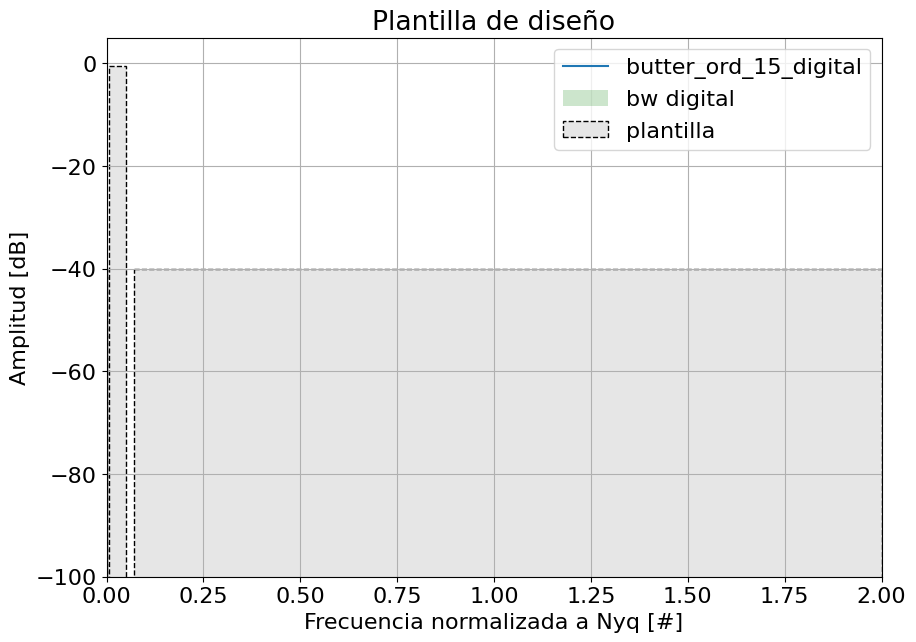

In [64]:
# Plantilla de diseño

plt.figure(1)
plt.cla()


w_nyq = 2*np.pi*fs/2

plt.plot(w/w_nyq, 20*np.log10(abs(h)), label=my_digital_filter_desc)

plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plt.gca().set_xlim([0, 2])

plot_plantilla(filter_type , fpass, ripple , fstop, atenuacion, fs)